In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
# 讀取資料
df = pd.read_excel("C:/Users/user/Downloads/tejdb.xls")
df['company'] = df['company'].str.slice(0, 4)
df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y-%m-%d')

C:\Users\user\AppData\Local\Temp\ipykernel_3356\3871654057.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']).dt.strftime('%Y-%m-%d')


c:\Users\user\anaconda3\envs\PY310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\PY310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\PY310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\PY310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

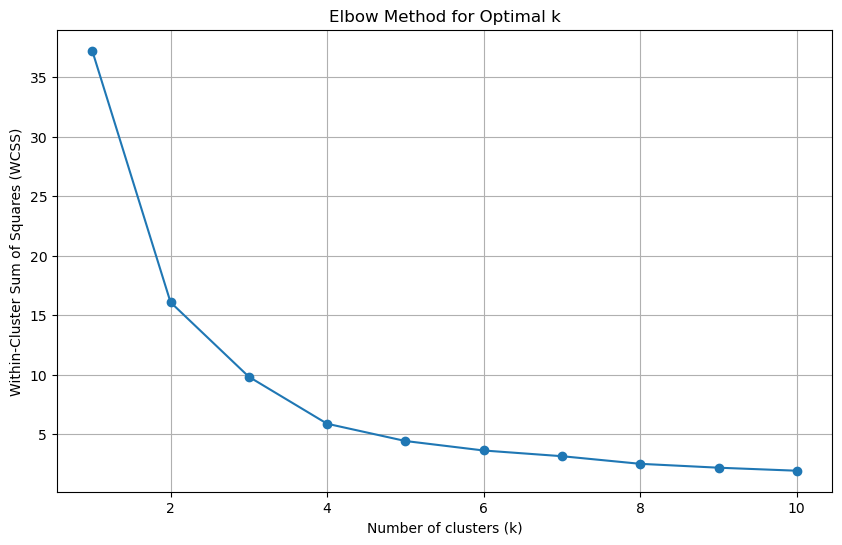

In [ ]:
X = df[['time', 'radf', 'dividend']].fillna(0)
X.index = X['time']
X = X.drop(columns=['time'])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 繪製肘部圖
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


c:\Users\user\anaconda3\envs\PY310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


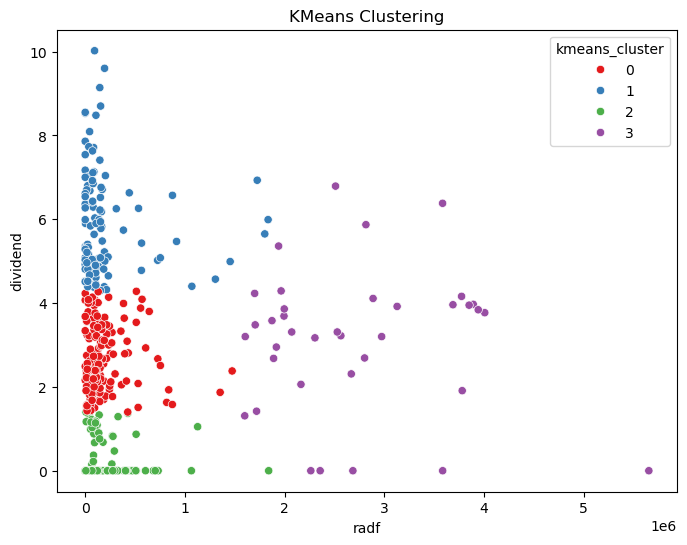

In [12]:
# KMeans 聚類
kmeans_model = KMeans(n_clusters=4,max_iter=1000,algorithm='lloyd')
df['kmeans_cluster'] = kmeans_model.fit_predict(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x='radf', y='dividend', hue='kmeans_cluster', data=df, palette='Set1')
plt.title('KMeans Clustering')
plt.show()

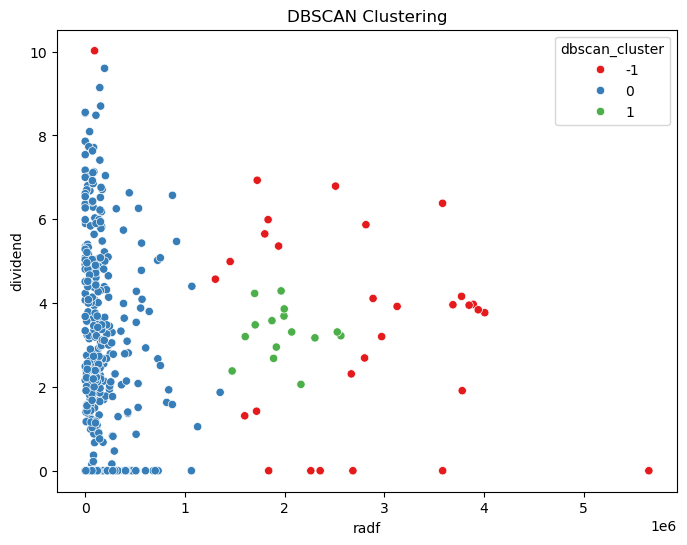

In [13]:
# 使用 DBSCAN 進行聚類
dbscan_model = DBSCAN(eps=0.1, min_samples=10)
df['dbscan_cluster'] = dbscan_model.fit_predict(X)
# 可視化 DBSCAN 分群結果
plt.figure(figsize=(8,6))
sns.scatterplot(x='radf', y='dividend', hue='dbscan_cluster', data=df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

In [14]:
# df.to_excel('C:/Users/user/Downloads/分群結果.xlsx',index=False)
# df

,company,time,srpp,radf,dividend,kmeans_cluster,dbscan_cluster
0,2314,2023-12-01,947.0,682354.0,0.00,2,0
1,2321,2023-12-01,619.0,76938.0,0.00,2,0
2,2332,2023-12-01,NaN,728340.0,2.67,0,0
3,2345,2023-12-01,NaN,3780598.0,1.91,3,-1
4,2412,2023-12-01,14611.0,3891381.0,3.97,3,-1
...,...,...,...,...,...,...,...
498,8059,2019-12-01,1720.0,67532.0,0.00,2,0
499,8089,2019-12-01,NaN,153441.0,5.94,1,0
500,8097,2019-12-01,2181.0,6635.0,0.00,2,0
501,8101,2019-12-01,553.0,404091.0,0.00,2,0


In [72]:
data_list = []
for company, group in df.groupby('company'):
    group = group[['time', 'radf', 'dividend']].dropna(subset=['radf', 'dividend'])
    time_series = group.to_dict('records')
    data = {
        'company': company,
        'time_series': time_series
    }
    data_list.append(data)
data_list

[{'company': '2314',
  'time_series': [{'time': '2023-12-01', 'radf': 682354.0, 'dividend': 0.0},
   {'time': '2022-12-01', 'radf': 731186.0, 'dividend': 0.0},
   {'time': '2021-12-01', 'radf': 701953.0, 'dividend': 0.0},
   {'time': '2020-12-01', 'radf': 604499.0, 'dividend': 0.0},
   {'time': '2019-12-01', 'radf': 507214.0, 'dividend': 0.0}]},
 {'company': '2321',
  'time_series': [{'time': '2023-12-01', 'radf': 76938.0, 'dividend': 0.0},
   {'time': '2022-12-01', 'radf': 79300.0, 'dividend': 0.0},
   {'time': '2021-12-01', 'radf': 66381.0, 'dividend': 0.0},
   {'time': '2020-12-01', 'radf': 83703.0, 'dividend': 0.0},
   {'time': '2019-12-01', 'radf': 134391.0, 'dividend': 0.0}]},
 {'company': '2332',
  'time_series': [{'time': '2023-12-01', 'radf': 728340.0, 'dividend': 2.67},
   {'time': '2022-12-01', 'radf': 530747.0, 'dividend': 1.51},
   {'time': '2021-12-01', 'radf': 873752.0, 'dividend': 1.58},
   {'time': '2020-12-01', 'radf': 1127417.0, 'dividend': 1.05},
   {'time': '2019-1

In [15]:
cluster_data=pd.read_excel('C:/Users/user/Downloads/分群結果.xlsx').fillna(0)
cluster_data

,company,time,srpp,radf,dividend,kmeans_cluster,dbscan_cluster
0,2314,2023-12-01,947.0,682354.0,0.00,2,0
1,2321,2023-12-01,619.0,76938.0,0.00,2,0
2,2332,2023-12-01,0.0,728340.0,2.67,0,0
3,2345,2023-12-01,0.0,3780598.0,1.91,3,-1
4,2412,2023-12-01,14611.0,3891381.0,3.97,3,-1
...,...,...,...,...,...,...,...
498,8059,2019-12-01,1720.0,67532.0,0.00,2,0
499,8089,2019-12-01,0.0,153441.0,5.94,1,0
500,8097,2019-12-01,2181.0,6635.0,0.00,2,0
501,8101,2019-12-01,553.0,404091.0,0.00,2,0


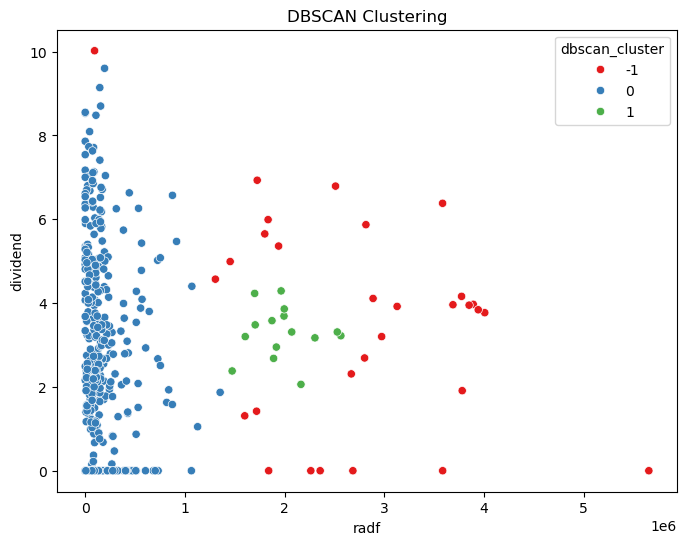

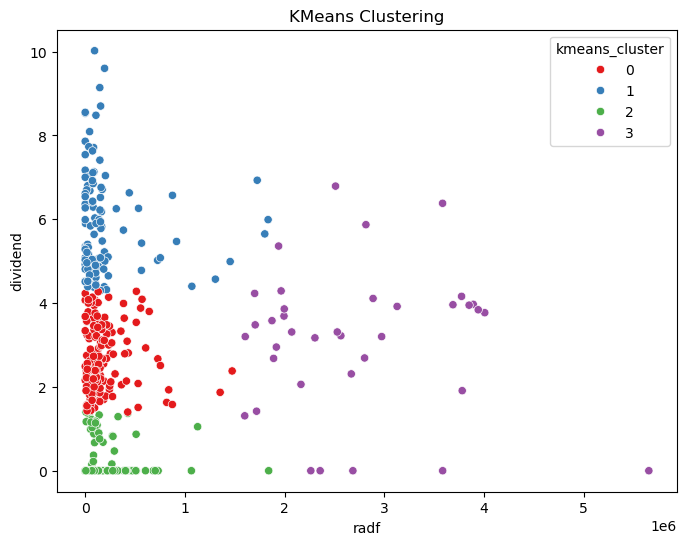

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='radf', y='dividend', hue='dbscan_cluster', data=cluster_data, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(x='radf', y='dividend', hue='kmeans_cluster', data=cluster_data, palette='Set1')
plt.title('KMeans Clustering')
plt.show()

In [23]:
kmeans_series = cluster_data[cluster_data['kmeans_cluster'] == 3]
dbscan_series = cluster_data[cluster_data['dbscan_cluster'] == 1]
kmeans_series

,company,time,srpp,radf,dividend,kmeans_cluster,dbscan_cluster
3,2345,2023-12-01,0.0,3780598.0,1.91,3,-1
4,2412,2023-12-01,14611.0,3891381.0,3.97,3,-1
7,2439,2023-12-01,568.0,1964625.0,4.29,3,1
12,2498,2023-12-01,3231.0,2684392.0,0.00,3,-1
28,3380,2023-12-01,0.0,1889315.0,2.68,3,1
36,3596,2023-12-01,1011.0,2886769.0,4.11,3,-1
44,3704,2023-12-01,584.0,1916643.0,2.95,3,1
55,5388,2023-12-01,863.0,3127890.0,3.92,3,-1
69,6285,2023-12-01,936.0,4006750.0,3.77,3,-1
102,2345,2022-12-01,0.0,2972931.0,3.20,3,-1


In [24]:
# 計算 kmeans_series 中 srpp、radf 和 dividend 的第四分位數
kmeans_radf_75 = kmeans_series['radf'].quantile(0.75)
kmeans_dividend_75 = kmeans_series['dividend'].quantile(0.75)

# 篩選 kmeans_series 中大於第四分位數的列
filtered_kmeans_series = kmeans_series[
    (kmeans_series['radf'] > kmeans_radf_75) &
    (kmeans_series['dividend'] > kmeans_dividend_75)
]
# 打印篩選後的結果
print("Filtered kmeans_series:")
filtered_kmeans_series

Filtered kmeans_series:


,company,time,srpp,radf,dividend,kmeans_cluster,dbscan_cluster
4,2412,2023-12-01,14611.0,3891381.0,3.97,3,-1
103,2412,2022-12-01,14577.0,3774309.0,4.16,3,-1


In [22]:
# 計算 dbscan_series 中 srpp、radf 和 dividend 的第四分位數
dbscan_radf_50 = dbscan_series['radf'].quantile(0.5)
dbscan_dividend_50 = dbscan_series['dividend'].quantile(0.5)

# 篩選 dbscan_series 中大於第四分位數的列
filtered_dbscan_series = dbscan_series[
    (dbscan_series['radf'] > dbscan_radf_50) &
    (dbscan_series['dividend'] > dbscan_dividend_50)
]
print("Filtered dbscan_series:")
filtered_dbscan_series

Filtered dbscan_series:


,company,time,srpp,radf,dividend,kmeans_cluster,dbscan_cluster
404,2345,2019-12-01,0.0,1993443.0,3.69,3,1
460,5388,2019-12-01,673.0,1996009.0,3.86,3,1


In [9]:
#讀取收盤價
pdata = pd.read_csv("C:/Users/user/Downloads/通訊.csv", encoding='utf-8')
pdata['time'] = pd.to_datetime(pdata['time'])
pdata['id'] = pdata['id'].str.slice(0, 4)
grouped = pdata.groupby('id')
pdata

,id,time,close
0,2412,2024-12-17,123.5
1,5388,2024-12-17,108.0
2,2345,2024-12-17,740.0
3,2412,2024-12-16,123.0
4,5388,2024-12-16,111.0
...,...,...,...
721,5388,2023-12-19,133.5
722,2345,2023-12-19,512.0
723,2412,2023-12-18,118.5
724,5388,2023-12-18,136.5


In [ ]:
close_diff = {}
return_rate={}
for id, group in grouped:
    first_close = group['return'].iloc[0]
    last_close = group['return'].iloc[-1]
    close_diff[id] = first_close - last_close
    return_rate[id] = round((first_close - last_close) / first_close,2)

# 打印每個分組的 close 差異
for id, diff in close_diff.items():
    print(f"ID: {id}, Close Difference: {diff}")
print(f"ID: {id}, Return Rate: {return_rate}")

       id       time  return  cumulative_return
2    2345 2024-12-17  0.5435       5.435000e-01
5    2345 2024-12-16 -1.3405      -1.525562e+00
8    2345 2024-12-13  4.7753      -4.035277e+00
11   2345 2024-12-12 -2.4658       3.449109e+00
14   2345 2024-12-11  3.3994       1.857341e+01
..    ...        ...     ...                ...
712  5388 2023-12-22  1.5267       6.902672e+07
715  5388 2023-12-21 -1.5038      -3.477566e+07
718  5388 2023-12-20 -0.3745      -2.175218e+07
721  5388 2023-12-19 -2.1978       2.605476e+07
724  5388 2023-12-18 -0.3650       1.654477e+07

[726 rows x 4 columns]
ID: 2345, Close Difference: -1.0375
ID: 2412, Close Difference: 0.4065
ID: 5388, Close Difference: -2.3377
ID: 5388, Return Rate: {'2345': -1.91, '2412': 1.0, '5388': 0.86}


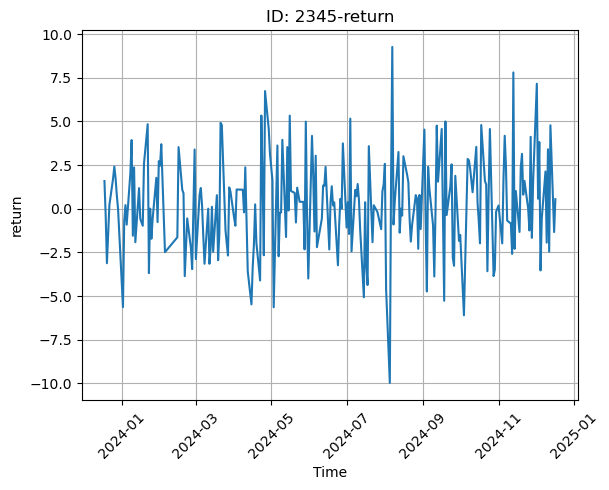

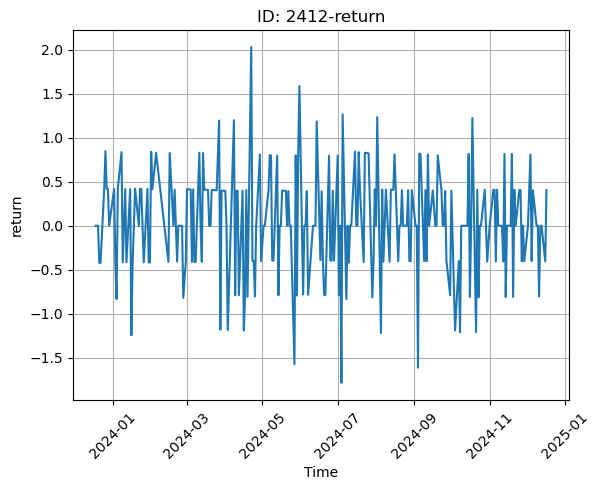

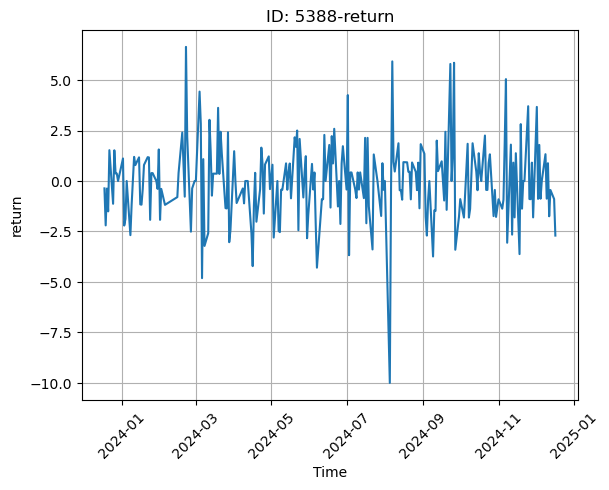

In [6]:
for id, group in grouped:
    plt.figure()
    plt.plot(group['time'], group['return'])
    plt.title(f'ID: {id}-return')
    plt.xlabel('Time')
    plt.ylabel('return')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

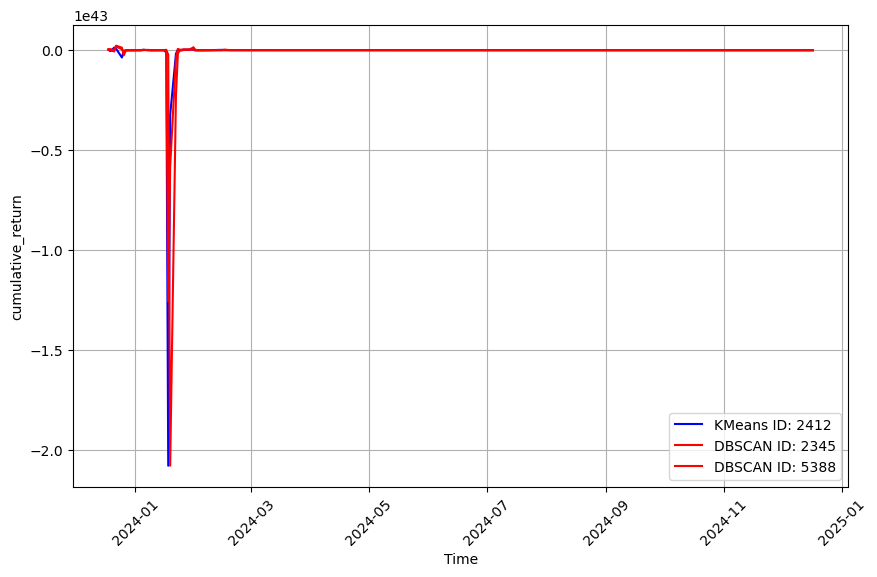

In [7]:
dbscan_selected_ids = ['2345','5388']
kmeans_selected_ids = ['2412']

# 繪製多個 id 的 close 價格變化圖在同一張圖中
plt.figure(figsize=(10, 6))


for id in kmeans_selected_ids:
    group = pdata[pdata['id'] == id]
    plt.plot(group['time'], group['return'], label=f'KMeans ID: {id}', color='blue')

for id in dbscan_selected_ids:
    group = pdata[pdata['id'] == id]
    plt.plot(group['time'], group['return'], label=f'DBSCAN ID: {id}', color='red')

plt.xlabel('Time')
plt.ylabel('day_return')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()